In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from datetime import date, timedelta

In [41]:
import pandas as pd

start_date = "2015-01-01"
end_date = "2020-01-01"

index_ticker = "MASI"

stocks_tickers = [
    "GAZ",
    "ADI",
    "ATL",
    "ATW",
    "BOA",
    "BCP",
    "BCI",
    "CMA",
    "CSR",
    "ADH",
    "HPS",
    "IAM",
    "LBV",
    "LHM",
    "MNG",
    "SID"
]

date_range = pd.date_range(start=start_date, end=end_date, name="Date")

filtered_dates = date_range[date_range.weekday < 5]

main_df = pd.DataFrame({"Date": filtered_dates})


def load_ticker_df(main_df, ticker, is_an_index=False):
    base_path = "indexes/" if is_an_index else "stocks/"
    ticker_df = pd.read_csv(base_path + ticker + ".csv", dtype={"Dernier": str})
    ticker_df = ticker_df[["Date", "Dernier"]]
    ticker_df["Date"] = pd.to_datetime(ticker_df["Date"], format="%d/%m/%Y")
    ticker_df.rename(columns={"Dernier": ticker}, inplace=True)
    ticker_df[ticker] = ticker_df[ticker].str.replace(".", "")
    ticker_df[ticker] = pd.to_numeric(ticker_df[ticker].str.replace(",", "."))
    main_df = pd.merge(main_df, ticker_df, on="Date", how="left")
    return main_df


main_df = load_ticker_df(main_df, index_ticker, True)

for n, ticker in enumerate(stocks_tickers):
    main_df = load_ticker_df(main_df, ticker)

main_df = main_df.sort_values(by=["Date"])

main_df.head(1000)

,Date,MASI,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
0,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,9643.19,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,NaN,NaN,37.50,375.0,115.00,NaN,NaN,964.0,950.0
2,2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,9651.78,NaN,275.0,65.16,343.90,211.74,214.50,712.0,NaN,111.0,38.00,370.0,114.75,NaN,1445.0,1019.0,995.0
4,2015-01-07,9750.30,NaN,280.0,68.60,348.90,214.65,217.00,NaN,NaN,NaN,39.00,371.0,116.60,NaN,1431.0,989.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-25,11099.91,2947.0,96.0,61.89,431.10,180.18,272.30,710.0,1450.0,167.0,13.22,2280.0,144.35,NaN,1550.0,1130.0,525.0
996,2018-10-26,11070.96,NaN,95.0,61.70,430.25,180.13,271.05,739.0,1430.0,169.0,13.20,2300.0,141.70,1997.0,1598.0,1130.0,NaN
997,2018-10-29,11028.07,NaN,95.0,NaN,430.20,180.72,271.00,NaN,1450.0,169.0,13.20,NaN,140.00,NaN,1570.0,1120.0,515.0
998,2018-10-30,10916.02,NaN,91.0,60.00,426.00,180.23,268.00,NaN,1425.0,163.0,13.07,2300.0,138.10,1965.0,1570.0,1120.0,519.0


In [42]:
filled_main_df = main_df.ffill().bfill()

filled_main_df.head(1000)

,Date,MASI,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
0,2015-01-01,9643.19,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,995.0,111.0,37.50,375.0,115.00,1314.0,1445.0,964.0,950.0
1,2015-01-02,9643.19,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,995.0,111.0,37.50,375.0,115.00,1314.0,1445.0,964.0,950.0
2,2015-01-05,9643.19,1999.0,283.0,68.80,343.90,215.19,211.50,710.0,995.0,111.0,37.50,375.0,115.00,1314.0,1445.0,964.0,950.0
3,2015-01-06,9651.78,1999.0,275.0,65.16,343.90,211.74,214.50,712.0,995.0,111.0,38.00,370.0,114.75,1314.0,1445.0,1019.0,995.0
4,2015-01-07,9750.30,1999.0,280.0,68.60,348.90,214.65,217.00,712.0,995.0,111.0,39.00,371.0,116.60,1314.0,1431.0,989.0,995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-10-25,11099.91,2947.0,96.0,61.89,431.10,180.18,272.30,710.0,1450.0,167.0,13.22,2280.0,144.35,1986.0,1550.0,1130.0,525.0
996,2018-10-26,11070.96,2947.0,95.0,61.70,430.25,180.13,271.05,739.0,1430.0,169.0,13.20,2300.0,141.70,1997.0,1598.0,1130.0,525.0
997,2018-10-29,11028.07,2947.0,95.0,61.70,430.20,180.72,271.00,739.0,1450.0,169.0,13.20,2300.0,140.00,1997.0,1570.0,1120.0,515.0
998,2018-10-30,10916.02,2947.0,91.0,60.00,426.00,180.23,268.00,739.0,1425.0,163.0,13.07,2300.0,138.10,1965.0,1570.0,1120.0,519.0


In [43]:
def normalize_stocks(df):
    df = df.copy()
    for stock in df.columns[1:]:
        df[stock] = df[stock] / df.loc[0, stock]
    return df


norm_stocks_df = normalize_stocks(filled_main_df)
norm_stocks_df.head(100)

,Date,MASI,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
0,2015-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2015-01-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2015-01-06,1.000891,1.000000,0.971731,0.947093,1.000000,0.983968,1.014184,1.002817,1.000000,1.000000,1.013333,0.986667,0.997826,1.000000,1.000000,1.057054,1.047368
4,2015-01-07,1.011107,1.000000,0.989399,0.997093,1.014539,0.997491,1.026005,1.002817,1.000000,1.000000,1.040000,0.989333,1.013913,1.000000,0.990311,1.025934,1.047368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-05-14,1.020997,1.025513,0.388693,0.915988,1.020646,1.006413,1.063830,0.891549,1.155779,1.072072,0.832000,1.197333,1.104783,0.751142,1.076125,0.924274,0.884211
96,2015-05-15,1.021626,1.025513,0.395760,0.943169,1.020646,1.006878,1.064303,0.914085,1.120603,1.081081,0.834667,1.197333,1.109130,0.796043,1.045675,0.933610,0.884211
97,2015-05-18,1.024411,1.025513,0.395760,0.943169,1.020791,1.006878,1.068558,0.914085,1.155779,1.099099,0.834667,1.197333,1.108696,0.796043,1.045675,0.933610,0.893684
98,2015-05-19,1.028799,1.025513,0.395760,0.944767,1.023553,1.006413,1.063121,0.915493,1.155779,1.099099,0.829333,1.197333,1.111739,0.787671,1.097578,0.974066,0.882105


In [44]:
fig = px.line(title = "Normalized stock prices")
 
for stock in norm_stocks_df.columns[1:]:
    fig.add_scatter(x = norm_stocks_df["Date"], y = norm_stocks_df[stock], name = stock)
fig.show()

In [45]:
def calculate_daily_returns(df):
    df_daily_returns = df.copy()
    for i in df.columns[1:]:
        df_daily_returns[i] = df[i].pct_change() * 100
        df_daily_returns.loc[0, i] = 0
    return df_daily_returns


daily_returns = calculate_daily_returns(main_df)
print(len(daily_returns))
daily_returns.head(100)

1305


/var/folders/xd/0tgynr1x1kz2cjhxp38w759h0000gn/T/ipykernel_80552/2601065293.py:4: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



,Date,MASI,GAZ,ADI,ATL,ATW,BOA,BCP,BCI,CMA,CSR,ADH,HPS,IAM,LBV,LHM,MNG,SID
0,2015-01-01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
3,2015-01-06,0.089078,0.0,-2.826855,-5.290698,0.000000,-1.603234,1.418440,0.281690,NaN,NaN,1.333333,-1.333333,-0.217391,NaN,NaN,5.705394,4.736842
4,2015-01-07,1.020744,0.0,1.818182,5.279312,1.453911,1.374327,1.165501,0.000000,NaN,0.000000,2.631579,0.270270,1.612200,NaN,-0.968858,-2.944063,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-05-14,-0.005687,0.0,-3.508772,-0.300585,-0.156450,-0.046153,0.806452,-0.627943,0.000000,0.000000,-0.605288,0.000000,0.039370,0.000000,0.000000,-3.362256,-3.114187
96,2015-05-15,0.061550,0.0,1.818182,2.967312,0.000000,0.046174,0.044444,2.527646,-3.043478,0.840336,0.320513,0.000000,0.393546,5.977710,-2.829582,1.010101,0.000000
97,2015-05-18,0.272642,0.0,0.000000,0.000000,0.014245,0.000000,0.399822,0.000000,3.139013,1.666667,0.000000,0.000000,-0.039200,0.000000,0.000000,0.000000,1.071429
98,2015-05-19,0.428300,0.0,0.000000,0.169518,0.270617,-0.046153,-0.508850,0.154083,0.000000,0.000000,-0.638978,0.000000,0.274510,-1.051625,4.963600,4.333333,-1.295642


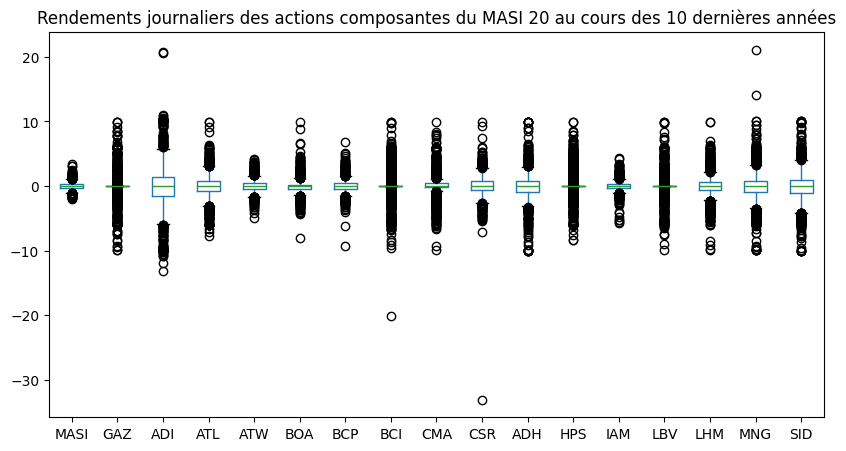

In [46]:
daily_returns.boxplot(figsize=(10, 5), grid=False)
plt.title("Rendements journaliers des actions composantes du MASI 20 au cours des 10 dernières années")
plt.show()

In [47]:
trading_days_count = 251  # MA
risk_free_rate = 4.080  # MA 10Y T-BILLS
market_return = daily_returns[index_ticker].mean() * trading_days_count

tickers = []
betas = []
capm_expected_returns = []
historical_expected_returns = []

for n, ticker in enumerate(stocks_tickers):
    cov = daily_returns[ticker].cov(daily_returns[index_ticker])
    var = daily_returns[index_ticker].var()
    beta = cov / var
    capm_expected_return = risk_free_rate + (beta * (market_return - risk_free_rate))
    historical_expected_return = daily_returns[ticker].mean() * trading_days_count

    tickers.append(ticker)
    betas.append(beta)
    capm_expected_returns.append(capm_expected_return)
    historical_expected_returns.append(historical_expected_return)

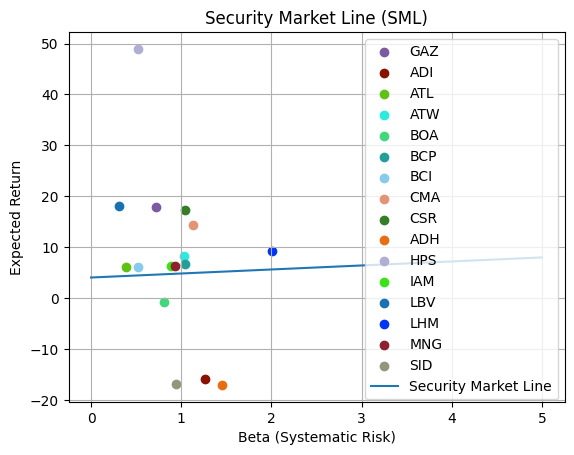

In [48]:
beta_values = np.linspace(0, 5)

# Calculate expected returns using the Capital Asset Pricing Model (CAPM)
expected_returns = risk_free_rate + beta_values * (market_return - risk_free_rate)

for n, ticker in enumerate(tickers):
    plt.scatter(
        betas[n],
        historical_expected_returns[n],
        label=ticker,
        color=np.random.rand(3),
    )

# Plotting the Security Market Line (SML)
plt.plot(beta_values, expected_returns, label="Security Market Line")

# Adding labels and title
plt.xlabel("Beta (Systematic Risk)")
plt.ylabel("Expected Return")
plt.title("Security Market Line (SML)")
plt.legend()

# Show plot
plt.grid(True)
plt.show()